In [1]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import sys

import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
mdl='esm3_seqstruct'
l=22
seqlens = {'AQADK_CPMG': 206,
'BLAC_CPMG': 266,
'BLVRB_CPMG': 206,
'CYPA_CPMG': 165,
'VHR_CPMG': 185,
'ARGKIN_CPMG': 357,
'GRB2SH2_CPMG': 96,
'RNASE_CPMG': 124,
'CHEY_CPMG': 129,
'HTPDZ_CPMG': 109,
'KRAS_CPMG': 169}


cpmg = pd.read_json('Dyna_1_example_outputs/cpmg_esm3_seqstruct_layer22.json.zip')

#eval included unsuppressed R2 token
cpmg_new = pd.read_json('Dyna_1_example_outputs/cpmg_esm3_seqstruct_layer22_Y.json.zip')

cpmg['seq len'] = cpmg.apply(lambda row: seqlens[row['entry_ID']], axis=1)

cpmg = cpmg.merge(cpmg_new, on='entry_ID', suffixes=('','_unsuppr'))

# datasets that had complete dispersion data to evaluate unsuppressed R2 with
cpmg_raw = cpmg.iloc[[0,1,2,4,5,10]]

# datasets that did not
cpmg_no_raw = cpmg.iloc[[3,7,8,9]]

print(cpmg_raw.AUROC.mean())
print(cpmg_no_raw.AUROC.mean())

0.6648474388166666
0.63617720305


In [4]:
cpmg_no_raw[['entry_ID','AUROC']]

,entry_ID,AUROC
3,ARGKIN_CPMG,0.655128
7,RNASE_CPMG,0.555926
8,CHEY_CPMG,0.731023
9,HTPDZ_CPMG,0.602632


In [5]:
cpmg_raw[['entry_ID','AUROC','AUROC_unsuppr']]

,entry_ID,AUROC,AUROC_unsuppr
0,AQADK_CPMG,0.666586,0.648788
1,CYPA_CPMG,0.725016,0.741781
2,BLVRB_CPMG,0.711755,0.757202
4,VHR_CPMG,0.729508,0.755848
5,BLAC_CPMG,0.619858,0.698435
10,KRAS_CPMG,0.536361,0.544576


Text(0.5, 0, 'Seq. length')

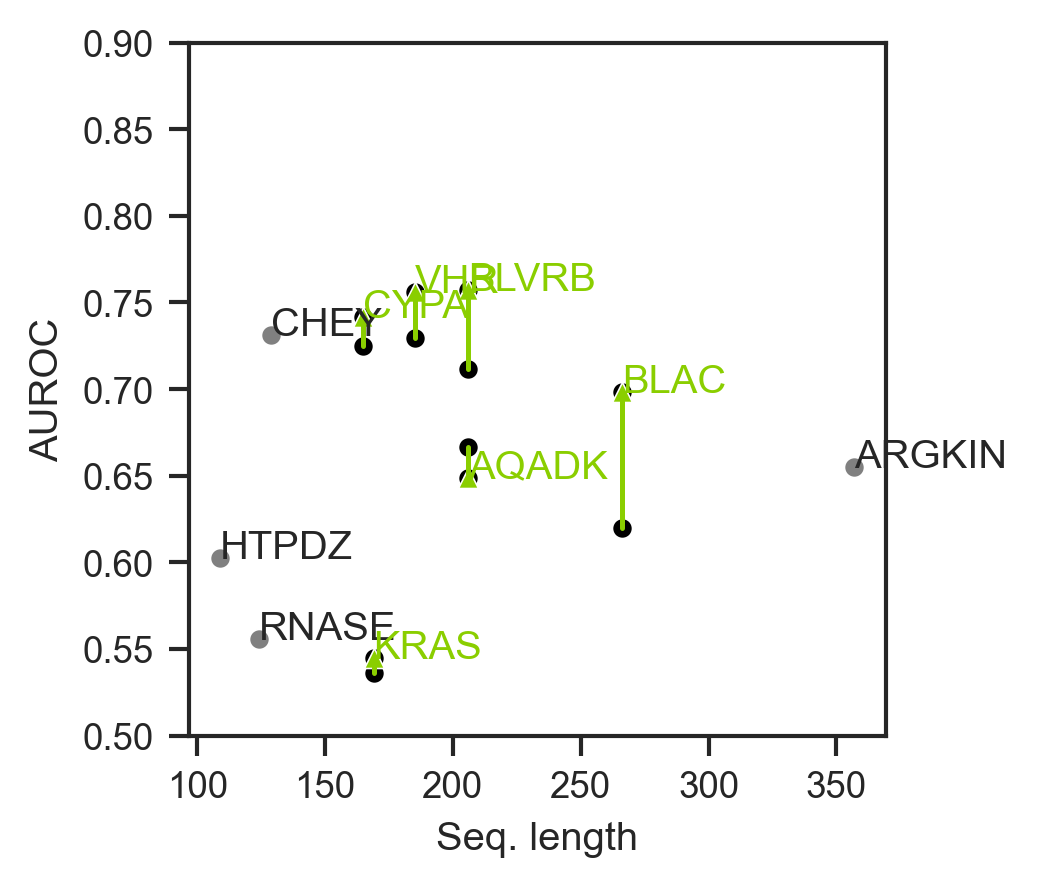

In [6]:
figure(figsize=(3,3))

sns.scatterplot(x='seq len', y='AUROC',data=cpmg_no_raw,color='grey')
for _, row in cpmg_no_raw.iterrows():
    text(row['seq len'], row['AUROC'],row['entry_ID'].replace('_CPMG',''))

sns.scatterplot(x='seq len', y='AUROC',data=cpmg_raw,color='k')
sns.scatterplot(x='seq len', y='AUROC_unsuppr',data=cpmg_raw,color='k')
sns.scatterplot(x='seq len', y='AUROC_unsuppr',data=cpmg_raw,color='#8ACE00',marker='^')

for _, row in cpmg_raw.iterrows():
    plot([row['seq len'],row['seq len']],[row['AUROC'], row['AUROC_unsuppr']], color='#8ACE00')
    text(row['seq len'], row['AUROC_unsuppr'],row['entry_ID'].replace('_CPMG',''),color='#8ACE00')

ylabel('AUROC')
ylim([0.5,0.9])
xlabel('Seq. length')

Text(0.5, 0, 'Seq. length')

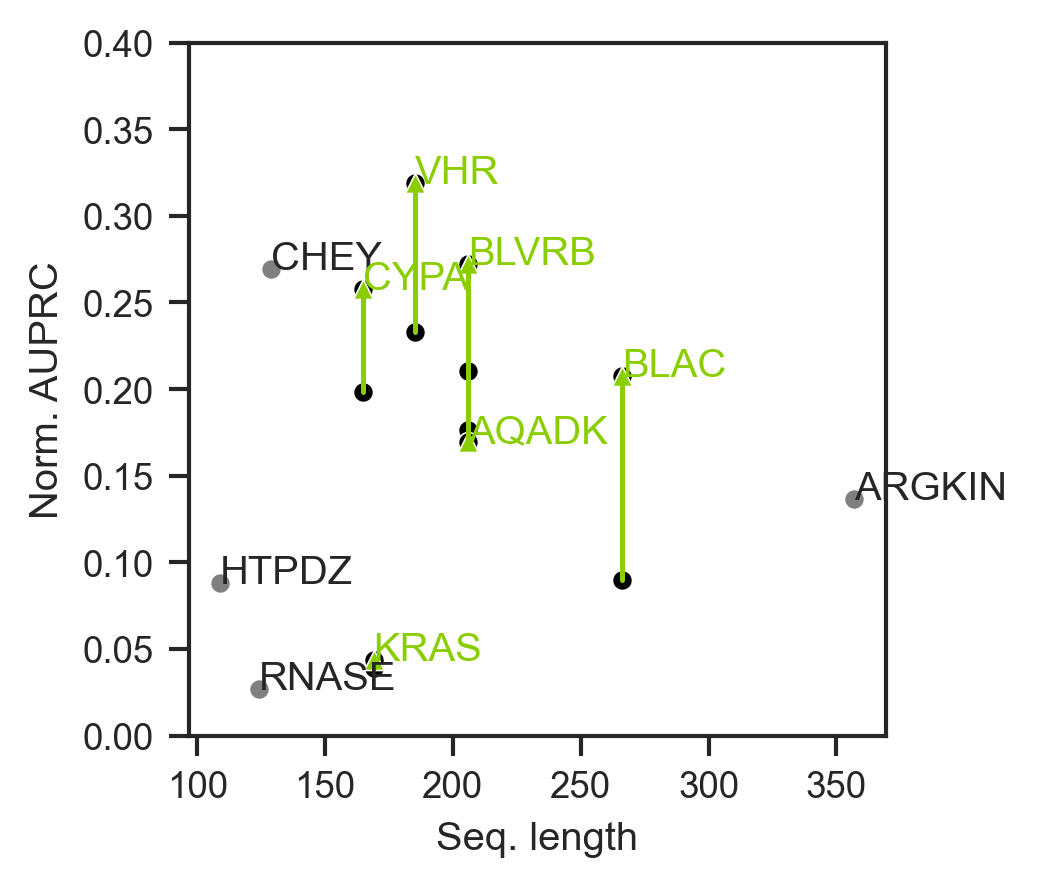

In [7]:
figure(figsize=(3,3))

sns.scatterplot(x='seq len', y='AUPRC_norm',data=cpmg_no_raw,color='grey')
for _, row in cpmg_no_raw.iterrows():
    text(row['seq len'], row['AUPRC_norm'],row['entry_ID'].replace('_CPMG',''))

sns.scatterplot(x='seq len', y='AUPRC_norm',data=cpmg_raw,color='k')
sns.scatterplot(x='seq len', y='AUPRC_norm_unsuppr',data=cpmg_raw,color='k')
sns.scatterplot(x='seq len', y='AUPRC_norm_unsuppr',data=cpmg_raw,color='#8ACE00',marker='^')

for _, row in cpmg_raw.iterrows():
    plot([row['seq len'],row['seq len']],[row['AUPRC_norm'], row['AUPRC_norm_unsuppr']], color='#8ACE00')
    text(row['seq len'], row['AUPRC_norm_unsuppr'],row['entry_ID'].replace('_CPMG',''),color='#8ACE00')

ylim([0,0.4])
ylabel('Norm. AUPRC')
xlabel('Seq. length')